#### **Example Support Vector Machines (SVM) usage**

Example of classification on the **iris dataset** using support vector machines (SVM).

In [88]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC # SVC: Support Vector Classification

In [89]:
iris = datasets.load_iris()
Xir = iris["data"][:, (2, 3)] # We will use two predictor attributes: petal length, petal width
yir = (iris["target"] == 2).astype(np.float64) # Reformulate the problem as \
                                              # binary classification: virginica VS not virginica

svm_classifier = Pipeline([
                           ("scaler", StandardScaler()),
                           ("linear_svc", LinearSVC(C=1, loss="hinge")),
])

svm_classifier.fit(Xir, yir)

,steps,"[('scaler', ...), ('linear_svc', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,penalty,'l2'
,loss,'hinge'
,dual,'auto'
,tol,0.0001


In [90]:
svm_classifier.predict([[5.5, 1.7], [4.7, 1.6]])

array([1., 0.])

**PROPOSED EXERCISES**

*   Separate the *iris* data into training and test data.
*   Train several SVM models under different configurations for **C**.
*   Evaluate trained models on the test set -and also on the training data themselves-, compare and interpret the results obtained.

In [91]:
# Helper code to evaluate classification models (remove comments '#' before use):
from sklearn.metrics import accuracy_score

y_pred = svm_classifier.predict(Xir)
print('Accuracy:', accuracy_score(yir, y_pred))

Accuracy: 0.9533333333333334


**A STEP BEYOND: Non-linear SVMs** (*polynomial kernel*)

These advanced types of SVMs are better for classifying data that are not linearly separable. Through complex mathematics operations, data are transformed and projected into a different dimensional space (usually larger) to become linearly separable.

SVMs capable of doing this classification are called **kernel SVMs**, and they can implement different types of kernel functions, such as:



*   **Polynomial**: (*kernel = "poly"*) the decision boundaries learnt resemble a polynomial curve of degree specified by us.
*   **Gaussian**: (*kernel = "rbf"*) suitable to separate data which is pre-assumed to follow a gaussian distribution. 'RBF' stands for *radial basis function*.





In [92]:
from sklearn.datasets import make_moons
# make an example of non-linearly separable data
Xmn, ymn = make_moons(n_samples=100, noise=0.15, random_state=42)

from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
    ])
poly_kernel_svm_clf.fit(Xmn, ymn)

,steps,"[('scaler', ...), ('svm_clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,C,5
,kernel,'poly'
,degree,3
,gamma,'scale'


In [93]:
y_pred = poly_kernel_svm_clf.predict(Xmn)
print('Accuracy:', accuracy_score(ymn, y_pred))

Accuracy: 0.98


#### **Visualization Function**

**Support Vectors**

In [94]:
import matplotlib.pyplot as plt

def plot_decision_support_vectors(clf, X, y, cmap='Paired_r', title ='Plot for linear SVM'):
    # Data points
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap)
    # Get plot min and max limit
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    # plot decision boundary and margins
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    # plot support vectors
    dfX = clf.decision_function(X)
    sv_ind = np.where(np.abs(dfX) <= 1 + 1e-15)[0]
    sv = X[sv_ind]
    plt.scatter(sv[:, 0], sv[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')
    plt.title(title)
    plt.show()

/opt/miniconda3/envs/DL_tor271/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/DL_tor271/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/DL_tor271/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


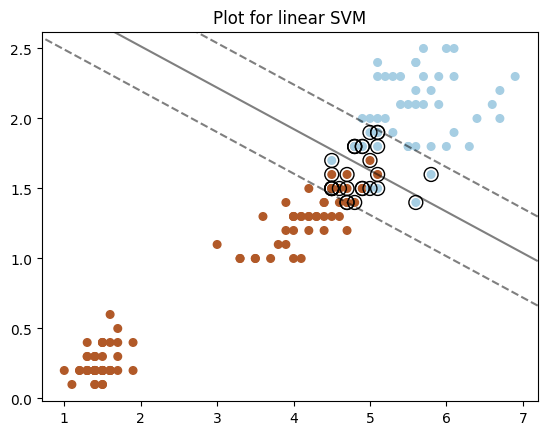

In [95]:
plot_decision_support_vectors(svm_classifier, Xir, yir)

**Decision Boundary**

In [96]:
import matplotlib.pyplot as plt

def plot_decision_boundary(clf, X, y, cmap='Paired_r', title ='Plot for non-linear SVM'):
    h = 0.005  # Boundary lines' resolution
    x_min, x_max = X[:,0].min() - 10*h, X[:,0].max() + 10*h
    y_min, y_max = X[:,1].min() - 10*h, X[:,1].max() + 10*h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(7,6))
    plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.25)  # Background
    plt.contour(xx, yy, Z, colors='k', linewidths=0.2)  # Boundary lines
    plt.scatter(X[:,0], X[:,1], c=y, cmap=cmap);  # Data points
    plt.title(title)
    plt.show()
    # plt.xlabel(iris.feature_names[2])
    # plt.ylabel(iris.feature_names[3])

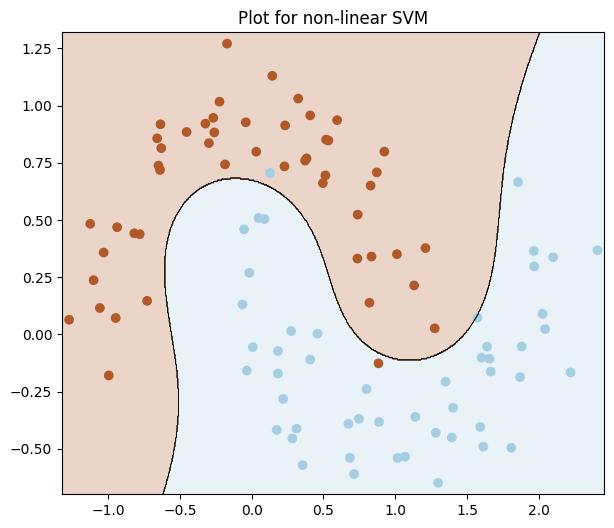

In [97]:
plot_decision_boundary(poly_kernel_svm_clf, Xmn, ymn)

#### **From scratch implementation**

**Example Dataset**

In [98]:
# iris dataset
# We will use two predictor attributes: petal length, petal width
X1 = iris["data"][:, (2, 3)]
y1 = (iris["target"] == 2).astype(np.float64)

# two half moon data
from sklearn.datasets import make_moons
X2, y2 = make_moons(n_samples=100, noise=0.15, random_state=42)

# circular data
from sklearn.datasets import make_circles
X3, y3 = noisy_circles = make_circles(n_samples=100, factor=.5, noise=.05, random_state=42)

**From theory to practice: Linear SVM model**

In [ ]:
# https://adeveloperdiary.com/data-science/machine-learning/support-vector-machines-for-beginners-linear-svm/
# https://dev.to/harsimranjit_singh_0133dc/support-vector-machines-from-hard-margin-to-soft-margin-1bj1

# Soft Margin SVM
class SVM_Linear_Scratch:
    def __init__(self, C=1, batch_size=100, learning_rate=0.001, iterations=1000):
        # C = error term
        self.C = C
        self.batch_size = batch_size
        self.iterations = iterations
        self.learning_rate = learning_rate
        self.w = None
        self.b = None

    def decision_function(self, X):
        return np.dot(X, self.w) + self.b # w.x + b

    def hingeloss(self, w, b, x, y):
        # Regularizer term
        reg = 0.5 * (w * w)

        for i in range(x.shape[0]):
            # Optimization term
            opt_term = y[i] * ((np.dot(w, x[i])) + b)
            loss = reg + self.C * max(0, 1 - opt_term)

        return loss[0]

    def fit(self, X, Y):
        # initialize
        n_samples = X.shape[0]
        n_features = X.shape[1]
        self.w = np.zeros(n_features)
        self.b = 0
        losses = []

        # convert y to signed value (-1, +1)
        Y = np.where(Y <= 0, -1, 1)

        # gradient descent optimization start
        for i in range(self.iterations):
            l = self.hingeloss(self.w, self.b, X, Y)
            losses.append(l)

            # iterate through samples with batch_size as interval
            for batch_start in range(0, n_samples, self.batch_size):
                gradw = 0
                gradb = 0
                for x in range(batch_start, batch_start + self.batch_size):
                    if x >= n_samples:
                        break
                     # correct classification
                    if Y[x] * self.decision_function(X[x]) >= 1:
                        gradw += 0 # w = w - α*w
                        gradb += 0  # b = b
                    # misclassification
                    else:
                        gradw += self.C * Y[x] * X[x]  # w = w - α*(w - C*yi*xi)
                        gradb += self.C * Y[x] # b = b - α*(C*yi)

                # Updating weights and bias
                self.w += self.learning_rate * gradw
                self.b += self.learning_rate * gradb

        return self.w, self.b, losses

    def predict(self, X):
        prediction = self.decision_function(X)
        label_signs = np.sign(prediction)
        result = np.where(label_signs <= -1, 0, 1)
        return result

**Test Linear SVM from scratch**

Accuracy: 0.9466666666666667


/var/folders/38/3c1bccln3k33mh_2125g7wvm0000gp/T/ipykernel_1837/2995231061.py:16: RuntimeWarning: divide by zero encountered in dot
  return np.dot(X, self.w) + self.b # w.x + b
/var/folders/38/3c1bccln3k33mh_2125g7wvm0000gp/T/ipykernel_1837/2995231061.py:16: RuntimeWarning: overflow encountered in dot
  return np.dot(X, self.w) + self.b # w.x + b
/var/folders/38/3c1bccln3k33mh_2125g7wvm0000gp/T/ipykernel_1837/2995231061.py:16: RuntimeWarning: invalid value encountered in dot
  return np.dot(X, self.w) + self.b # w.x + b


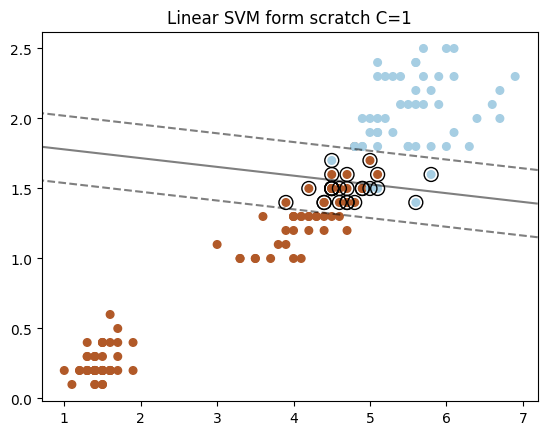

In [100]:
svm_ls1 = SVM_Linear_Scratch(C=1)
svm_ls1.fit(X1, y1)
pred_ls1 = svm_ls1.predict(X1)
print('Accuracy:', accuracy_score(y1, pred_ls1))

plot_decision_support_vectors(svm_ls1, X1, y1, title='Linear SVM form scratch C=1')

Accuracy: 0.9666666666666667


/var/folders/38/3c1bccln3k33mh_2125g7wvm0000gp/T/ipykernel_1837/2995231061.py:16: RuntimeWarning: divide by zero encountered in dot
  return np.dot(X, self.w) + self.b # w.x + b
/var/folders/38/3c1bccln3k33mh_2125g7wvm0000gp/T/ipykernel_1837/2995231061.py:16: RuntimeWarning: overflow encountered in dot
  return np.dot(X, self.w) + self.b # w.x + b
/var/folders/38/3c1bccln3k33mh_2125g7wvm0000gp/T/ipykernel_1837/2995231061.py:16: RuntimeWarning: invalid value encountered in dot
  return np.dot(X, self.w) + self.b # w.x + b


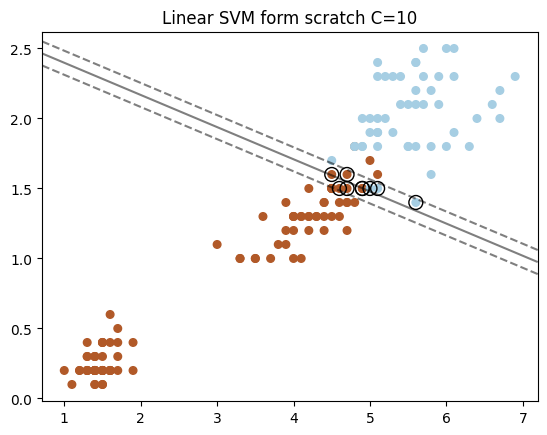

In [101]:
svm_ls2 = SVM_Linear_Scratch(C=10)
svm_ls2.fit(X1, y1)
pred_ls2 = svm_ls2.predict(X1)

print('Accuracy:', accuracy_score(y1, pred_ls2))
plot_decision_support_vectors(svm_ls2, X1, y1, title='Linear SVM form scratch C=10')

**From theory to practice: Non-linear SVM model (Polynomial and Gaussian)**

In [102]:
# https://adeveloperdiary.com/data-science/machine-learning/support-vector-machines-for-beginners-kernel-svm/

class SVM_Non_Linear_Scratch:
    def __init__(self, kernel='poly', C=1, degree=2, const=1, sigma=0.1, iterations=1000, learning_rate= 0.001):
        self.X = None
        self.y = None
        self.alpha = None
        self.ones = None
        self.b = 0
        self.C = C
        self.iterations = iterations
        self.learning_rate = learning_rate

        if kernel == 'poly':
            self.kernel = self.polynomial_kernel
            self.degree = degree
            self.const = const
        elif kernel == 'rbf':
            self.kernel =  self.gaussian_kernel
            self.sigma = sigma

    def polynomial_kernel(self, X, Z):
        # K(X, Z) = (c + X.Z)^degree
        return (self.const + X.dot(Z.T))**self.degree

    def gaussian_kernel(self, X, Z):
        # K(X, Z) = e^( -(1/ σ2) * ||X-Z||^2 )
        return np.exp(-(1 / self.sigma ** 2) * np.linalg.norm(X[:, np.newaxis] - Z[np.newaxis, :], axis=2) ** 2)

    def decision_function(self, X):
        # ŷ = sign( (αi*yi).K(xi, xi) + b )
        return (self.alpha * self.y).dot(self.kernel(self.X, X)) + self.b

    def fit(self, X, y):
        y = np.where(y <= 0, -1, 1)
        self.X = X
        self.y = y
        self.alpha = np.random.random(X.shape[0])
        self.ones = np.ones(X.shape[0])
        self.b = 0
        losses = []

        # (yi*yj) * K(xi, xj)
        kernel_mat = np.outer(y, y) * self.kernel(X, X)

        for i in range(self.iterations):
            # 1 – yk * ∑( αj*yj * K(xj, xk) )
            gradient = self.ones - kernel_mat.dot(self.alpha)
            # α = α + η*(1 – yk * ∑( αj*yj * K(xj, xk) )) update as per gradient descent rule
            self.alpha = self.alpha + self.learning_rate * gradient
            # 0 < α < C
            self.alpha[self.alpha > self.C] = self.C
            self.alpha[self.alpha < 0] = 0
            # ∑( αi – (1/2) * ∑i( ∑j( αi*αj * (yi*yj) * K(xi, xj) ) ) )
            loss = np.sum(self.alpha) - 0.5 * np.sum(np.outer(self.alpha, self.alpha) * kernel_mat)
            losses.append(loss)

        # for bias, only consider α which 0 < α < C
        # b = avg(0≤αi≤C){ yi – ∑( αj*yj * K(xj, xi) ) }
        index = np.where((self.alpha) > 0 & (self.alpha < self.C))[0]
        b_ind = y[index] - (self.alpha * y).dot(self.kernel(X, X[index]))
        self.b = np.mean(b_ind)

        return self.alpha, self.b, losses

    def predict(self, X):
        prediction = self.decision_function(X)
        label_signs = np.sign(prediction)
        result = np.where(label_signs <= -1, 0, 1)
        return result

Accuracy: 0.85


/var/folders/38/3c1bccln3k33mh_2125g7wvm0000gp/T/ipykernel_1837/3549344439.py:48: RuntimeWarning: divide by zero encountered in dot
  gradient = self.ones - kernel_mat.dot(self.alpha)
/var/folders/38/3c1bccln3k33mh_2125g7wvm0000gp/T/ipykernel_1837/3549344439.py:48: RuntimeWarning: overflow encountered in dot
  gradient = self.ones - kernel_mat.dot(self.alpha)
/var/folders/38/3c1bccln3k33mh_2125g7wvm0000gp/T/ipykernel_1837/3549344439.py:48: RuntimeWarning: invalid value encountered in dot
  gradient = self.ones - kernel_mat.dot(self.alpha)
/var/folders/38/3c1bccln3k33mh_2125g7wvm0000gp/T/ipykernel_1837/3549344439.py:24: RuntimeWarning: divide by zero encountered in dot
  return (self.const + X.dot(Z.T))**self.degree
/var/folders/38/3c1bccln3k33mh_2125g7wvm0000gp/T/ipykernel_1837/3549344439.py:24: RuntimeWarning: overflow encountered in dot
  return (self.const + X.dot(Z.T))**self.degree
/var/folders/38/3c1bccln3k33mh_2125g7wvm0000gp/T/ipykernel_1837/3549344439.py:24: RuntimeWarning: inv

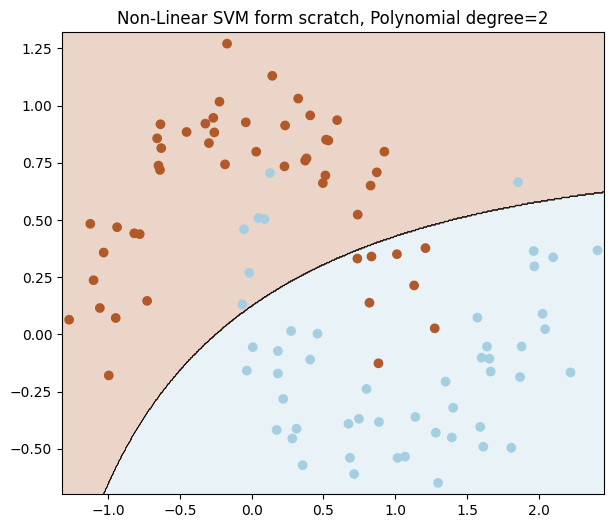

In [103]:
svm_nls1 = SVM_Non_Linear_Scratch(kernel='poly', degree=2)
svm_nls1.fit(X2, y2)
pred_nls1 = svm_nls1.predict(X2)

print('Accuracy:', accuracy_score(y2, pred_nls1))
plot_decision_boundary(svm_nls1, X2, y2, title='Non-Linear SVM form scratch, Polynomial degree=2')

/var/folders/38/3c1bccln3k33mh_2125g7wvm0000gp/T/ipykernel_1837/3549344439.py:24: RuntimeWarning: divide by zero encountered in dot
  return (self.const + X.dot(Z.T))**self.degree
/var/folders/38/3c1bccln3k33mh_2125g7wvm0000gp/T/ipykernel_1837/3549344439.py:24: RuntimeWarning: overflow encountered in dot
  return (self.const + X.dot(Z.T))**self.degree
/var/folders/38/3c1bccln3k33mh_2125g7wvm0000gp/T/ipykernel_1837/3549344439.py:24: RuntimeWarning: invalid value encountered in dot
  return (self.const + X.dot(Z.T))**self.degree
/var/folders/38/3c1bccln3k33mh_2125g7wvm0000gp/T/ipykernel_1837/3549344439.py:48: RuntimeWarning: divide by zero encountered in dot
  gradient = self.ones - kernel_mat.dot(self.alpha)
/var/folders/38/3c1bccln3k33mh_2125g7wvm0000gp/T/ipykernel_1837/3549344439.py:48: RuntimeWarning: overflow encountered in dot
  gradient = self.ones - kernel_mat.dot(self.alpha)
/var/folders/38/3c1bccln3k33mh_2125g7wvm0000gp/T/ipykernel_1837/3549344439.py:48: RuntimeWarning: invalid

Accuracy: 0.97


/var/folders/38/3c1bccln3k33mh_2125g7wvm0000gp/T/ipykernel_1837/3549344439.py:32: RuntimeWarning: divide by zero encountered in dot
  return (self.alpha * self.y).dot(self.kernel(self.X, X)) + self.b
/var/folders/38/3c1bccln3k33mh_2125g7wvm0000gp/T/ipykernel_1837/3549344439.py:32: RuntimeWarning: overflow encountered in dot
  return (self.alpha * self.y).dot(self.kernel(self.X, X)) + self.b
/var/folders/38/3c1bccln3k33mh_2125g7wvm0000gp/T/ipykernel_1837/3549344439.py:32: RuntimeWarning: invalid value encountered in dot
  return (self.alpha * self.y).dot(self.kernel(self.X, X)) + self.b


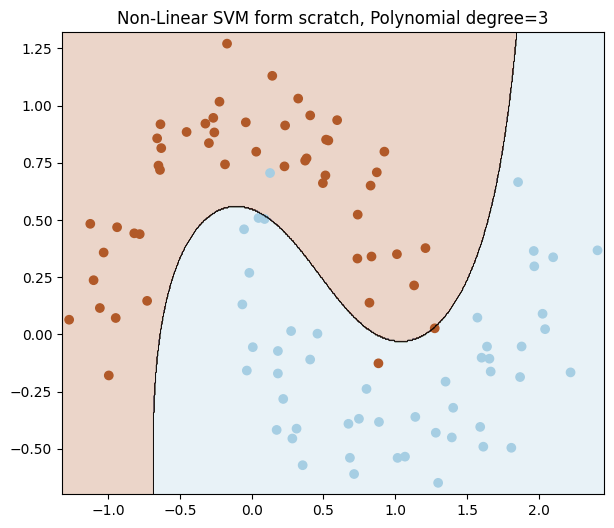

In [104]:
svm_nls2 = SVM_Non_Linear_Scratch(kernel='poly', degree=3)
svm_nls2.fit(X2, y2)
pred_nls2 = svm_nls2.predict(X2)

print('Accuracy:', accuracy_score(y2, pred_nls2))
plot_decision_boundary(svm_nls2, X2, y2, title='Non-Linear SVM form scratch, Polynomial degree=3')

/var/folders/38/3c1bccln3k33mh_2125g7wvm0000gp/T/ipykernel_1837/3549344439.py:48: RuntimeWarning: divide by zero encountered in dot
  gradient = self.ones - kernel_mat.dot(self.alpha)
/var/folders/38/3c1bccln3k33mh_2125g7wvm0000gp/T/ipykernel_1837/3549344439.py:48: RuntimeWarning: overflow encountered in dot
  gradient = self.ones - kernel_mat.dot(self.alpha)
/var/folders/38/3c1bccln3k33mh_2125g7wvm0000gp/T/ipykernel_1837/3549344439.py:48: RuntimeWarning: invalid value encountered in dot
  gradient = self.ones - kernel_mat.dot(self.alpha)
/var/folders/38/3c1bccln3k33mh_2125g7wvm0000gp/T/ipykernel_1837/3549344439.py:61: RuntimeWarning: divide by zero encountered in dot
  b_ind = y[index] - (self.alpha * y).dot(self.kernel(X, X[index]))
/var/folders/38/3c1bccln3k33mh_2125g7wvm0000gp/T/ipykernel_1837/3549344439.py:61: RuntimeWarning: overflow encountered in dot
  b_ind = y[index] - (self.alpha * y).dot(self.kernel(X, X[index]))
/var/folders/38/3c1bccln3k33mh_2125g7wvm0000gp/T/ipykernel_18

Accuracy: 1.0


/var/folders/38/3c1bccln3k33mh_2125g7wvm0000gp/T/ipykernel_1837/3549344439.py:32: RuntimeWarning: divide by zero encountered in dot
  return (self.alpha * self.y).dot(self.kernel(self.X, X)) + self.b
/var/folders/38/3c1bccln3k33mh_2125g7wvm0000gp/T/ipykernel_1837/3549344439.py:32: RuntimeWarning: overflow encountered in dot
  return (self.alpha * self.y).dot(self.kernel(self.X, X)) + self.b
/var/folders/38/3c1bccln3k33mh_2125g7wvm0000gp/T/ipykernel_1837/3549344439.py:32: RuntimeWarning: invalid value encountered in dot
  return (self.alpha * self.y).dot(self.kernel(self.X, X)) + self.b


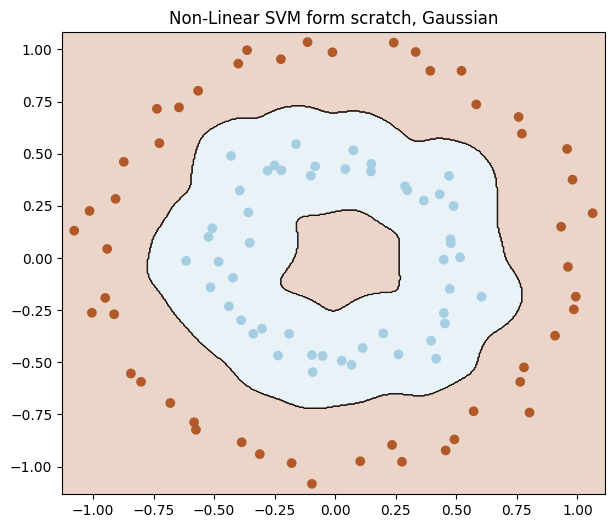

In [105]:
svm_nls3 = SVM_Non_Linear_Scratch(kernel='rbf')
svm_nls3.fit(X3, y3)
pred_nls3 = svm_nls3.predict(X3)

print('Accuracy:', accuracy_score(y3, pred_nls3))
plot_decision_boundary(svm_nls3, X3, y3, title='Non-Linear SVM form scratch, Gaussian')

#### **Exercise**

**Linear SVM model exercise**

In [106]:
X = iris["data"][:, (2, 3)]
y = (iris["target"] == 2).astype(np.float64)

In [107]:
#---------exercise-----------
svm_classifier.predict([[5.5, 1.7], [4.7, 1.6], [4.2, 1.3]])

array([1., 0., 0.])

In [108]:
#new C coeff for linear SVM model
svm_classifier_c2 = Pipeline([
                           ("scaler", StandardScaler()),
                           ("linear_svc", LinearSVC(C=2, loss="hinge")),
])
svm_classifier_c2.fit(X, y)
svm_classifier_c2.predict([[5.5, 1.7], [4.7, 1.6], [4.2, 1.3]])

y_pred_c2 = svm_classifier_c2.predict(X)
accuracy_score(y, y_pred_c2)
#------------------------------

#---Ans---
'''
The result of SVM model show that coef at 2 got the accuracy 0.87 more than at coef 1 for 0.5.
'''

'\nThe result of SVM model show that coef at 2 got the accuracy 0.87 more than at coef 1 for 0.5.\n'

In [109]:
#Try again with train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)
#C=1
svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_test)
a1 = accuracy_score(y_test, y_pred)
#C=2
svm_classifier_c2.fit(X_train, y_train)
y_pred_c2 = svm_classifier_c2.predict(X_test)
a2 = accuracy_score(y_test, y_pred_c2)

print("acc: acc[C=1]:{:.6f} acc[C=2]:{:.6f}".format(a1, a2))

#---Ans---
'''
  When trying to split train-test dataset and training with C=1 & C=2 (splitting 0.33 test_size)
  the accuracy is similar.
    -->acc: acc[C=1]:0.848485 acc[C=2]:0.848485
  If only test_size spliting in the range of [0.93, 0.96] got accuracy not the same.
    -->acc: acc[C=1]:0.760417 acc[C=2]:0.781250
'''

acc: acc[C=1]:0.980000 acc[C=2]:0.980000


'\n  When trying to split train-test dataset and training with C=1 & C=2 (splitting 0.33 test_size)\n  the accuracy is similar.\n    -->acc: acc[C=1]:0.848485 acc[C=2]:0.848485\n  If only test_size spliting in the range of [0.93, 0.96] got accuracy not the same.\n    -->acc: acc[C=1]:0.760417 acc[C=2]:0.781250\n'

**Non-linear SVM model exercise**

In [110]:
#new C coeff for non-linear SVM model

#model prep
poly_kernel_svm_d3 = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
    ])
poly_kernel_svm_d4 = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=4, coef0=1, C=5))
    ])
rbf_kernel_svm_d3 = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", degree=3, coef0=1, C=5))
    ])
rbf_kernel_svm_d4 = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", degree=4, coef0=1, C=5))
    ])

In [111]:
#Try again with train-test split
from sklearn.model_selection import train_test_split
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

poly_kernel_svm_d3.fit(X_train, y_train)
y_pred_pa1 = poly_kernel_svm_d3.predict(X_test)
poly_a1 = accuracy_score(y_test, y_pred_pa1)

poly_kernel_svm_d4.fit(X_train, y_train)
y_pred_pa2 = poly_kernel_svm_d4.predict(X_test)
poly_a2 = accuracy_score(y_test, y_pred_pa2)

rbf_kernel_svm_d3.fit(X_train, y_train)
y_pred_ra1 = rbf_kernel_svm_d3.predict(X_test)
rbf_a1 = accuracy_score(y_test, y_pred_ra1)

rbf_kernel_svm_d4.fit(X_train, y_train)
y_pred_ra2 = rbf_kernel_svm_d4.predict(X_test)
rbf_a2 = accuracy_score(y_test, y_pred_ra2)

print("accracy score\nSVM[poly, deg=3]:{}\nSVM[poly, deg=4]:{}\nSVM[RBF, deg=3]:{}\nSVM[RBF, deg=4]:{}"\
      .format(poly_a1, poly_a2, rbf_a1, rbf_a2))

#---Ans---
'''
polynomial non-linear SVM when changing degree of model --> the acc is changing the same.
but the RBF model is not calculating dependent on varied degree. Then, we would get the similar acc.
'''

accracy score
SVM[poly, deg=3]:0.9393939393939394
SVM[poly, deg=4]:0.8484848484848485
SVM[RBF, deg=3]:0.9393939393939394
SVM[RBF, deg=4]:0.9393939393939394


'\npolynomial non-linear SVM when changing degree of model --> the acc is changing the same.\nbut the RBF model is not calculating dependent on varied degree. Then, we would get the similar acc.\n'

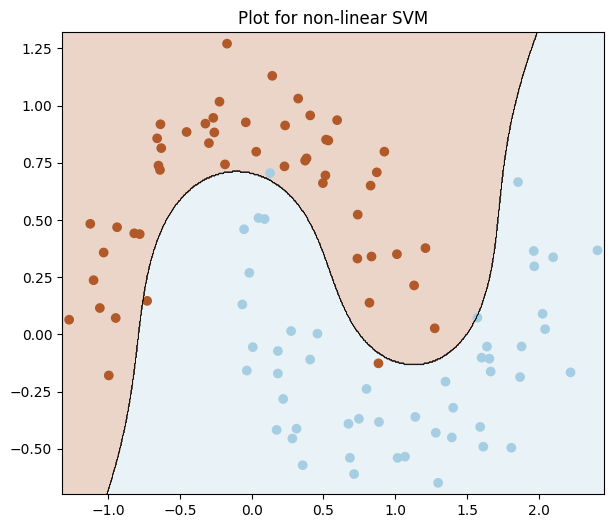

In [112]:
plot_decision_boundary(poly_kernel_svm_d3, X, y)

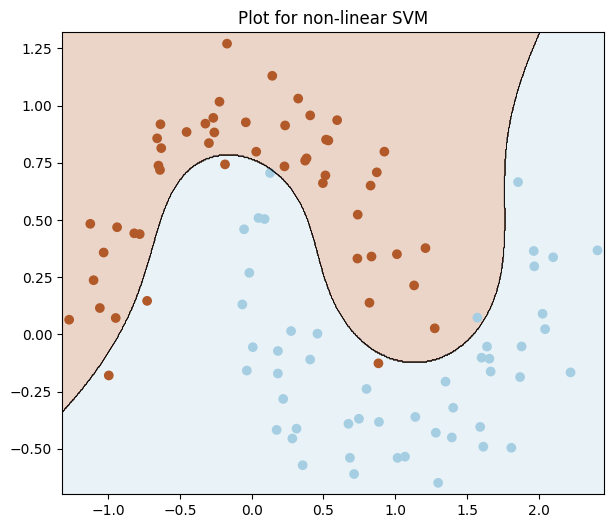

In [113]:
plot_decision_boundary(poly_kernel_svm_d4, X, y)

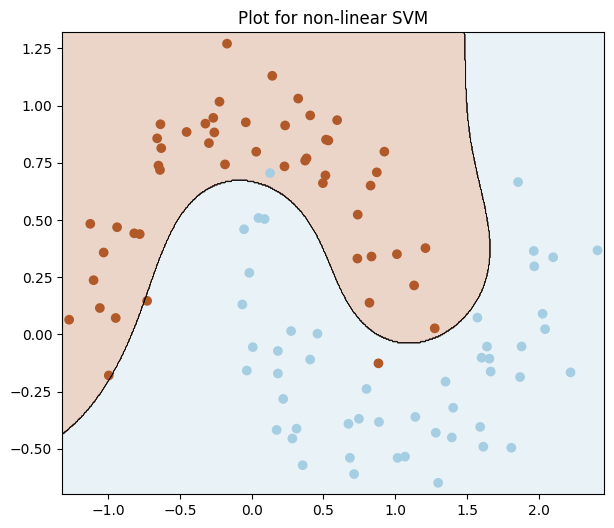

In [114]:
plot_decision_boundary(rbf_kernel_svm_d3, X, y)

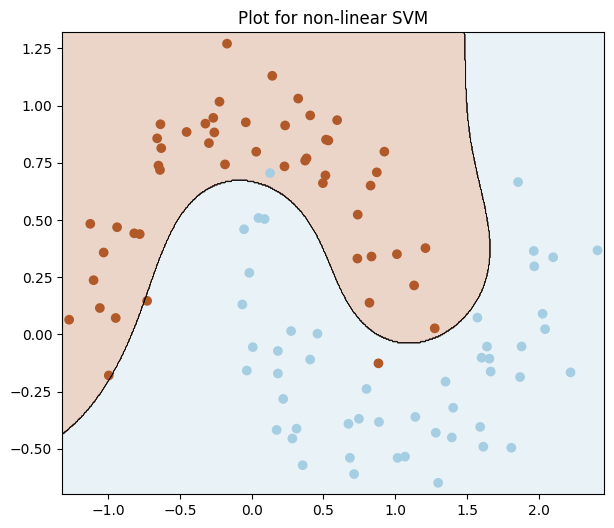

In [115]:
plot_decision_boundary(rbf_kernel_svm_d4, X, y)

#### **Extra**

**Linear SVM from scratch (simple, no batch iteration)**

In [116]:
# https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47

class SVM_Linear_Scratch_Simple:
    def __init__(self, C=1, iterations=1000, lr=0.001, lambdaa=0.01):
        self.C = C
        self.lambdaa = lambdaa
        self.iterations = iterations
        self.lr = lr
        self.w = None
        self.b = None

    def decision_function(self, X):
        return np.dot(X, self.w) - self.b

    def gradient_descent(self, X, y):
        # Updates the weights and bias using gradient descent.
        y_ = np.where(y <= 0, -1, 1)
        for i, x in enumerate(X):
            if y_[i] * self.decision_function(x) >= 1:
                dw = 2 * self.lambdaa * self.w # w = w - α * (2λw)
                db = 0 # b = b
            else:
                dw = 2 * self.lambdaa * self.w - self.C * np.dot(x, y_[i]) # w = w + α * (2λw - yixi)
                db = self.C * y_[i] # b = b - α * (yi)
            self.w = self.w - self.lr * dw
            self.b = self.b - self.lr * db

    def fit(self, X, y):
        m, n = X.shape
        self.w = np.zeros(n)
        self.b = 0

        for i in range(self.iterations):
            self.gradient_descent(X, y)

        return self.w, self.b

    def predict(self, X):
        output = self.decision_function(X)
        label_signs = np.sign(output)
        #set predictions to 0 if they are less than or equal to -1 else set them to 1
        predictions = np.where(label_signs <= -1, 0, 1)
        return predictions

# Homework

จาก XOR Dataset ที่สร้างขึ้น ให้ทดลองใช้ SVM เพื่อทำการ predict ข้อมูลและสรุปผล โดยกำหนดให้ใช้ kernel ดังนี้

 1. ใช้ Linear kernel จะได้ผลลัพธ์อย่างไร
 2. ใช้ Polynomial kernel และกำหนดให้ใช้ degree เป็น [2, 3, 4] จะได้ผลลัพธ์อย่างไร
 3. ใช้ Gaussian kernel และกำหนดให้ใช้ gamma เป็น ['scale', 2] จะได้ผลลัพธ์อย่างไร
 4. เรียงลำดับ kernel ที่ได้ผลลัพธ์ความแม่นยำที่ดีที่สุดจากมากไปน้อย
 5. อภิปรายคุณลักษณะของแต่ละวิธีการ เหตุใดจึงได้เป็นแบบนั้น


``` python
# /// Homework code for ML-based practice of SVM (linearly & non-linearly) ///
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Generate XOR dataset
np.random.seed(53)
X = np.random.randn(300, 2)
y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

def plot_dataset_2D(X, y):
  _, ax = plt.subplots()
  ax.set(xlim=(-3, 3), ylim=(-3, 3))
  scatter = ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.coolwarm, edgecolors="k")
  ax.legend(*scatter.legend_elements(), loc="upper right", title="Classes")
  ax.set_title("Samples in two-dimensional feature space")
  plt.show()

plot_dataset_2D(X, y)

# ...Your SVM model run...
# ...
# ...
# ...
# ...

from sklearn.svm import SVC
from sklearn.inspection import DecisionBoundaryDisplay

# plot your test
def plot_svc_decision_boundary(svc, X, y, title=" Decision boundaries in SVC", support_vectors=True):
  # Settings for plotting
  _, ax = plt.subplots()
  ax.set(xlim=(-3, 3), ylim=(-3, 3))

  # Plot decision boundary and margins
  common_params = {"estimator": svc, "X": X, "ax": ax}
  DecisionBoundaryDisplay.from_estimator(
    **common_params,
    response_method="predict",
    cmap=plt.cm.coolwarm,
    plot_method="pcolormesh",
    alpha=0.2,
  )
  DecisionBoundaryDisplay.from_estimator(
    **common_params,
    response_method="decision_function",
    plot_method="contour",
    levels=[-1, 0, 1],
    alpha=0.8,
    colors="k",
    linestyles=["--", "-", "--"],
  )

  if support_vectors:
    decision_function = svc.decision_function(X)
    sv_indices = np.where(np.abs(decision_function) <= 1 + 1e-15)[0]
    sv = X[sv_indices]
    # Plot bigger circles around samples that serve as support vectors
    ax.scatter(
      sv[:, 0],
      sv[:, 1],
      s=100,
      facecolors="none",
      edgecolors="k",
    )

  # Plot samples by color and add legend
  scatter = ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.coolwarm, edgecolors="k")
  ax.legend(*scatter.legend_elements(), loc="upper right", title="Classes")
  ax.set_title(title)
  plt.show()
  ```